In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Base directory where datasets are stored
base_dir = '../checkpoints/result/'
datasets = ['Beauty', 'HoneyBee', 'Jockey']

In [3]:
def parse_train_txt(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        last_line = lines[-1].strip()
        data = last_line.split(',')
        result = {
            'PSNR': float(data[1].split(':')[-1]),
            'MS-SSIM': float(data[2].split(':')[-1]),
            'Training': float(data[3].split(':')[-1][:-1]),
            'Eval': float(data[4].split(':')[-1][:-1]),
            'FPS': float(data[5].split(':')[-1]),
            'Size': float(data[6].split(':')[-1])
        }
    return result

In [4]:

# List to store results
results = []

# Loop through datasets and collect data from train.txt files
for dataset in datasets:
    dataset_path = os.path.join(base_dir, dataset)
    for dir_name in os.listdir(dataset_path):
        if dir_name.startswith('GaussianImage_Cholesky'):
            gaussian_count = int(dir_name.split('_')[-1])
            train_txt_path = os.path.join(dataset_path, dir_name, 'train.txt')
            if os.path.exists(train_txt_path):
                result = parse_train_txt(train_txt_path)
                result['GaussianCount'] = gaussian_count
                result['Dataset'] = dataset
                results.append(result)
# Sort the results by GaussianCount before converting to DataFrame
results_sorted = sorted(results, key=lambda x: x['GaussianCount'])
# Convert results to a DataFrame
df = pd.DataFrame(results_sorted)

In [5]:
def plot_gaussian_vs_metrics(df):
    for dataset in datasets:
        subset_df = df[df['Dataset'] == dataset].sort_values(by='GaussianCount')  # Ensure sorting by GaussianCount
        
        plt.figure(figsize=(10, 5))
        
        # Scatter plot of Gaussian count vs PSNR
        plt.subplot(2, 1, 1)
        # Scale down the size of circles for better display
        sizes = subset_df['Size'] * 2  # Scale the circle sizes
        plt.scatter(subset_df['GaussianCount'], subset_df['PSNR'], s=sizes, alpha=0.5, label='PSNR', c='b')

        # Mark the circle centers and connect them with a line
        plt.plot(subset_df['GaussianCount'], subset_df['PSNR'], 'b-', alpha=0.5)  
        for i in range(len(subset_df)):
            plt.annotate(f'{subset_df["Size"].iloc[i]:.2f} MB',  # Annotate with Size in MB
                         (subset_df['GaussianCount'].iloc[i], subset_df['PSNR'].iloc[i]),
                         textcoords="offset points", xytext=(0,-10), ha='center', va='center')

        plt.xlabel('Gaussian Count', fontsize=14)
        plt.ylabel('PSNR (dB)', fontsize=14)
        plt.title(f'{dataset} - Gaussian Count vs PSNR (Model Size as point size)', fontsize=14)
        plt.xticks(range(5000, 55000, 5000))  # X-axis ticks starting from 5000 with 5000 intervals
        plt.grid(True)
        
        # Scatter plot of Gaussian count vs MS-SSIM
        plt.subplot(2, 1, 2)
        plt.scatter(subset_df['GaussianCount'], subset_df['MS-SSIM'], s=sizes, alpha=0.5, label='MS-SSIM', c='r')

        # Mark the circle centers and connect them with a line
        plt.plot(subset_df['GaussianCount'], subset_df['MS-SSIM'], 'r-', alpha=0.5)
        for i in range(len(subset_df)):
            plt.annotate(f'{subset_df["Size"].iloc[i]:.2f} MB',  # Annotate with Size in MB
                         (subset_df['GaussianCount'].iloc[i], subset_df['MS-SSIM'].iloc[i]),
                         textcoords="offset points",xytext=(0,-10), ha='center', va='center')

        plt.xlabel('Gaussian Count', fontsize=14)
        plt.ylabel('MS-SSIM', fontsize=14)
        plt.title(f'{dataset} - Gaussian Count vs MS-SSIM (Model Size as point size)', fontsize=14)
        plt.xticks(range(5000, 55000, 5000))  # X-axis ticks starting from 5000 with 5000 intervals
        plt.grid(True)

        plt.tight_layout()
        plt.savefig(f'./img/{dataset}_gaussian_vs_metrics.png')
        plt.show()


In [6]:
# Function to plot Size vs PSNR, MS-SSIM, and Gaussian Count for each dataset separately
def plot_size_vs_metrics(df):
    for dataset in datasets:
        subset_df = df[df['Dataset'] == dataset].sort_values(by='Size')  # Ensure sorting by Size
        
        plt.figure(figsize=(10, 7.5))
        
        # Scatter plot of Size vs PSNR
        plt.subplot(3, 1, 1)
        sizes = subset_df['GaussianCount'] * 0.05  # Scale the circle sizes for Gaussian Count
        plt.scatter(subset_df['Size'], subset_df['PSNR'], s=sizes, alpha=0.5, label='PSNR', c='b')

        # Mark the circle centers with model size and connect them with a line
        plt.plot(subset_df['Size'], subset_df['PSNR'], 'b-', alpha=0.5)
        for i in range(len(subset_df)):
            plt.annotate(f'{subset_df["GaussianCount"].iloc[i]:.2f}',  # Annotate with Size in MB
                         (subset_df['Size'].iloc[i], subset_df['PSNR'].iloc[i]),
                         textcoords="offset points", xytext=(0, 0), ha='center', va='center')

        plt.xlabel('Model Size (MB)', fontsize=14)
        plt.ylabel('PSNR (dB)', fontsize=14)
        plt.title(f'{dataset} - Model Size vs PSNR (Gaussian Number as point size)', fontsize=14)
        plt.grid(True)
        
        # Scatter plot of Size vs MS-SSIM
        plt.subplot(3, 1, 2)
        plt.scatter(subset_df['Size'], subset_df['MS-SSIM'], s=sizes, alpha=0.5, label='MS-SSIM', c='r')

        # Mark the circle centers with model size and connect them with a line
        plt.plot(subset_df['Size'], subset_df['MS-SSIM'], 'r-', alpha=0.5)
        for i in range(len(subset_df)):
            plt.annotate(f'{subset_df["GaussianCount"].iloc[i]:.2f}',  # Annotate with Size in MB
                         (subset_df['Size'].iloc[i], subset_df['MS-SSIM'].iloc[i]),
                         textcoords="offset points", xytext=(0, 0), ha='center', va='center')

        plt.xlabel('Model Size (MB)', fontsize=14)
        plt.ylabel('MS-SSIM', fontsize=14)
        plt.title(f'{dataset} - Model Size vs MS-SSIM (Gaussian Number as point size)', fontsize=14)
        plt.grid(True)
        
        # Scatter plot of Size vs Gaussian Count
        plt.subplot(3, 1, 3)
        plt.scatter(subset_df['Size'], subset_df['GaussianCount'], s=sizes, alpha=0.5, label='Gaussian Count', c='g')

        # Mark the circle centers with model size and connect them with a line
        plt.plot(subset_df['Size'], subset_df['GaussianCount'], 'g-', alpha=0.5)
        for i in range(len(subset_df)):
            plt.annotate(f'{subset_df["GaussianCount"].iloc[i]:.2f}',  # Annotate with Size in MB
                         (subset_df['Size'].iloc[i], subset_df['GaussianCount'].iloc[i]),
                         textcoords="offset points", xytext=(0, 0), ha='center', va='center')

        plt.xlabel('Model Size (MB)', fontsize=14)
        plt.ylabel('Gaussian Count', fontsize=14)
        plt.title(f'{dataset} - Model Size vs Gaussian Count (Gaussian Number as point size)', fontsize=14)
        plt.grid(True)
        
        plt.tight_layout()
        plt.savefig(f'./img/{dataset}_size_vs_metrics.png')
        plt.show()


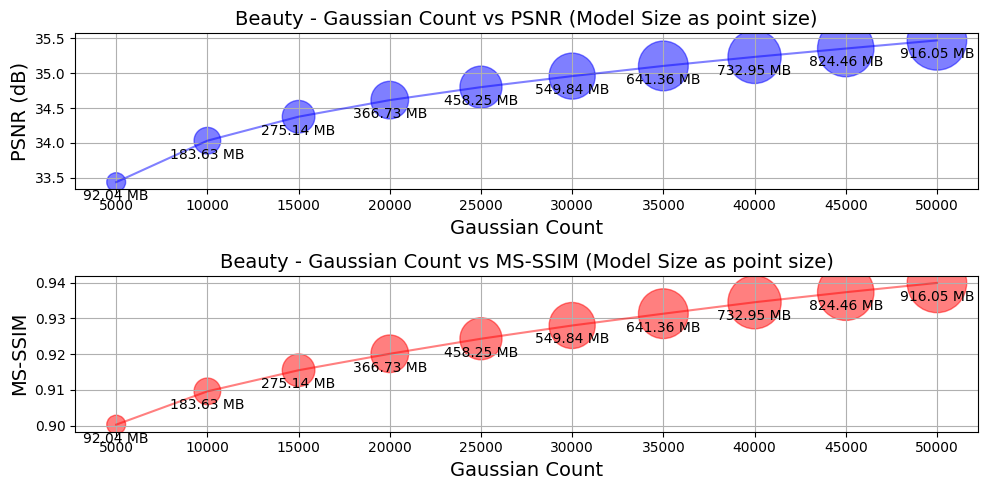

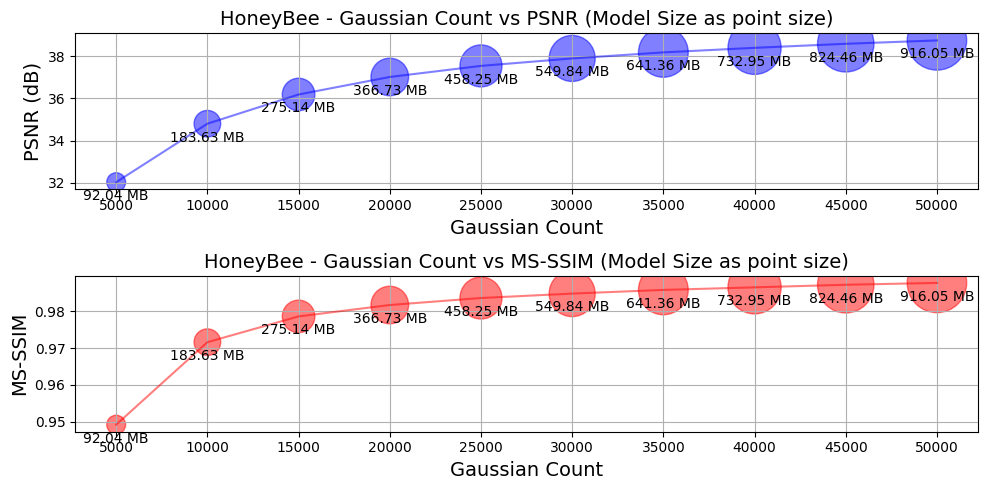

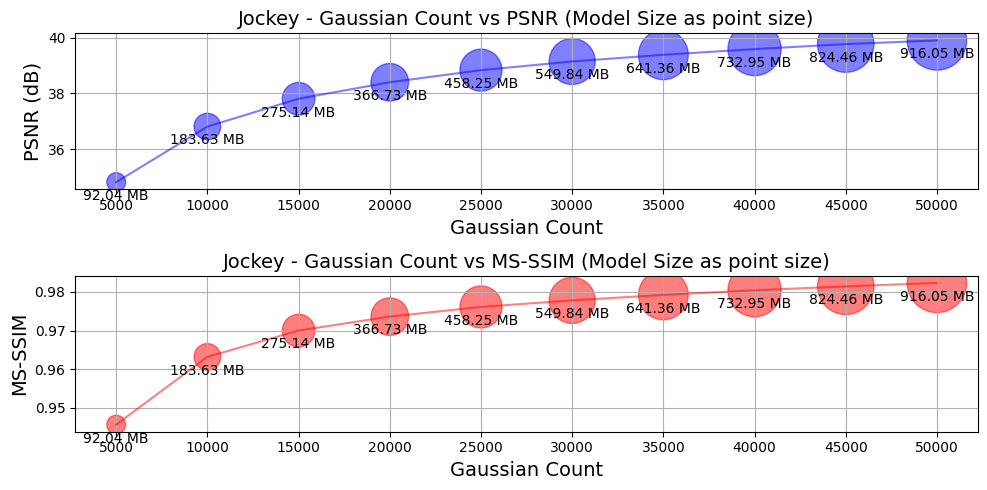

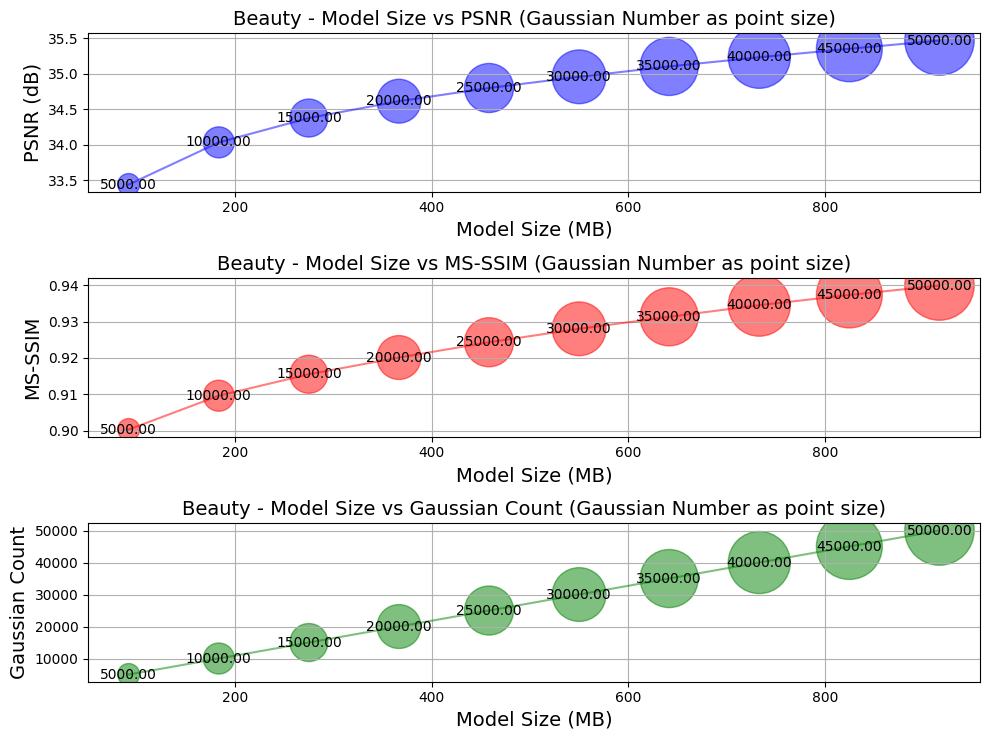

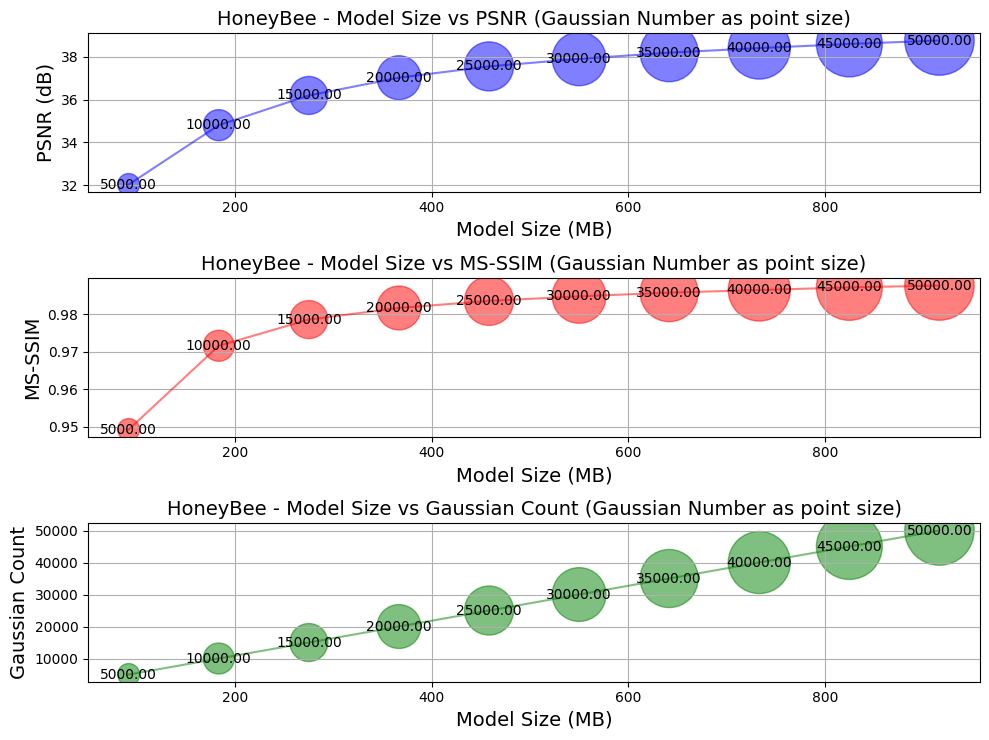

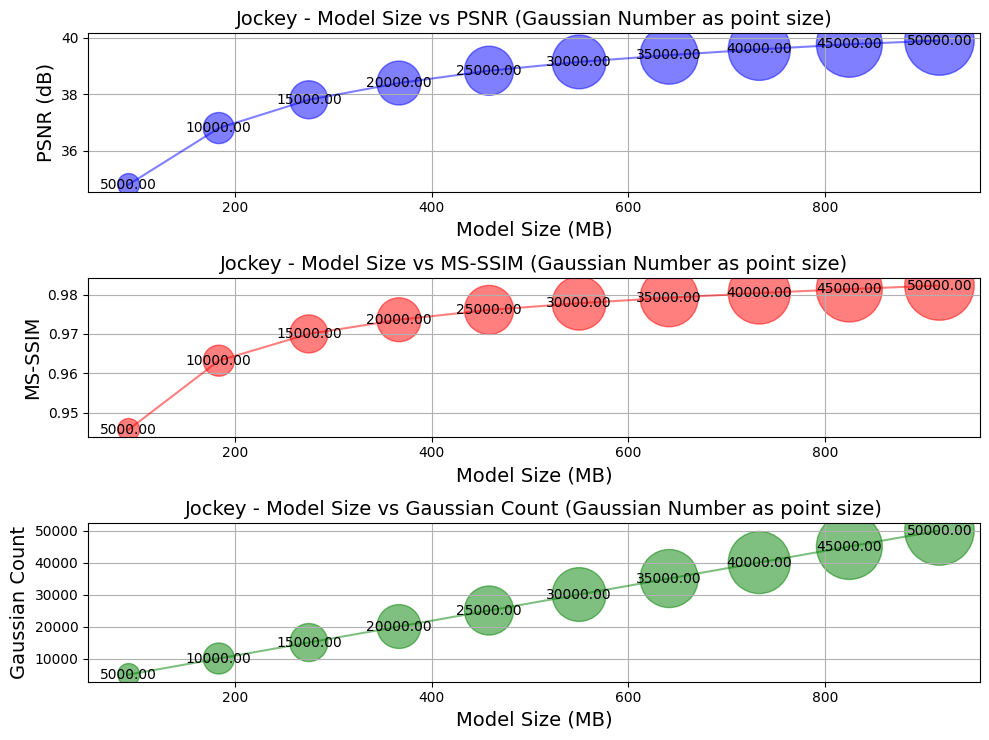

In [7]:
plot_gaussian_vs_metrics(df)
plot_size_vs_metrics(df)